## Project: Fashion MNIST Classification with CNN
### Project Description

In this project, you will build Convolutional Neural Networks (CNNs) to classify images of clothing from the Fashion MNIST dataset. The Fashion MNIST dataset consists of 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28x28 pixels):

60,000 training images
10,000 test images
Each image is labeled with one of the following classes:

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
Project Goal

The goal of this project is to build and train three different CNN models that can accurately classify images of clothing into their respective categories. Your models will take as input a 28x28 pixel grayscale image and predict which one of the 10 categories the image belongs to. After training, you will compare and evaluate the performance of these models.

### Instructions and Starter Code

1. Import Libraries

In [1]:
# Import necessary librarieimport tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


2. Load and Explore the Dataset

**Instructions:**

1. Load the Fashion MNIST dataset using `tf.keras.datasets.fashion_mnist.load_data()`.
2. Normalize the pixel values of the training and test images to be between 0 and 1.
3. Display the first 25 images from the training set along with their labels to understand the data.

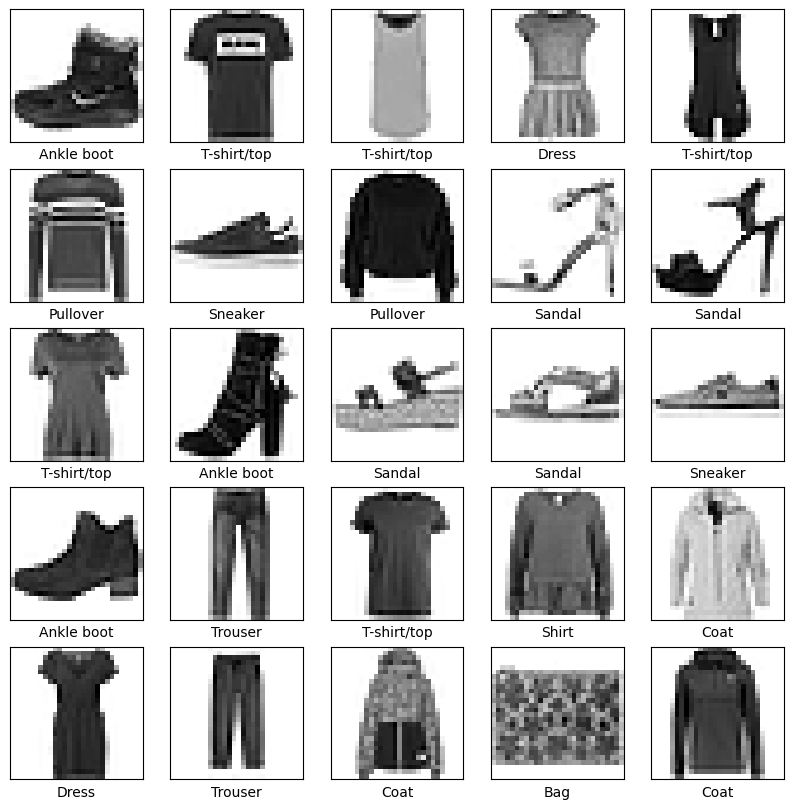

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first 25 images from the training set to understand the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


3. Build and Train Three Different CNN Models

**Instructions:**

1. Build three different CNN models using `tf.keras.Sequential()` and layers such as `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense`.
2. Compile each model using the 'adam' optimizer and `SparseCategoricalCrossentropy` loss.
3. Train each model for 10 epochs using the training data and validate it on the test data.
4. Save the training history of each model for later comparison.

**Instructions:**

1. Build three different CNN models using `tf.keras.Sequential()` and layers such as `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense`.
2. Compile each model using the 'adam' optimizer and `SparseCategoricalCrossentropy` loss.
3. Train each model for 10 epochs using the training data and validate it on the test data.
4. Save the training history of each model for later comparison.

In [5]:
# Model 1
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [10]:

# Model 2
model_2 = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', padding='SAME', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [11]:
# Model 3
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

 find check points to save the best model

In [14]:
# save the best model based on the optimized epoch results during training

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback_1 = ModelCheckpoint(
    filepath='best_model_1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

checkpoint_callback_2 = ModelCheckpoint(
    filepath='best_model_2.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

checkpoint_callback_3 = ModelCheckpoint(
    filepath='best_model_3.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)


In [16]:

# Compile the models
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the models
history_1 = model_1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), 
                       callbacks=[checkpoint_callback_1])

history_2 = model_2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),
                       callbacks=[checkpoint_callback_2])

history_3 = model_3.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),
                       callbacks=[checkpoint_callback_3])


Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 81.5811 - accuracy: 0.8222
Epoch 1: val_loss improved from inf to 109.02173, saving model to best_model_1.h5
1875/1875 [==============================] - 13s 7ms/step - loss: 81.6836 - accuracy: 0.8221 - val_loss: 109.0217 - val_accuracy: 0.8338
Epoch 2/10
  18/1875 [..............................] - ETA: 11s - loss: 102.5761 - accuracy: 0.8125

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1867/1875 [============================>.] - ETA: 0s - loss: 161.3983 - accuracy: 0.8156
Epoch 2: val_loss did not improve from 109.02173
1875/1875 [==============================] - 12s 6ms/step - loss: 161.9267 - accuracy: 0.8156 - val_loss: 245.1538 - val_accuracy: 0.7894
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 303.2916 - accuracy: 0.8114
Epoch 3: val_loss did not improve from 109.02173
1875/1875 [==============================] - 12s 6ms/step - loss: 303.8283 - accuracy: 0.8113 - val_loss: 279.2656 - val_accuracy: 0.8246
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 509.0631 - accuracy: 0.8058
Epoch 4: val_loss did not improve from 109.02173
1875/1875 [==============================] - 11s 6ms/step - loss: 509.0370 - accuracy: 0.8058 - val_loss: 689.4640 - val_accuracy: 0.7858
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 806.5897 - accuracy: 0.8029
Epoch 5: val_loss did not improve from 109.02173
1

4. Evaluate the Models

**Instructions:**

1. Evaluate each model using the test data.
2. Print the test accuracy for each model.

In [17]:
print(f"Best model for Model 1 saved at: {checkpoint_callback_1.filepath}")
print(f"Best model for Model 2 saved at: {checkpoint_callback_2.filepath}")
print(f"Best model for Model 3 saved at: {checkpoint_callback_3.filepath}")

Best model for Model 1 saved at: best_model_1.h5
Best model for Model 2 saved at: best_model_2.h5
Best model for Model 3 saved at: best_model_3.h5


In [23]:
#  best models metrics in a table 
# first load the best models
from tensorflow.keras.models import load_model
import pandas as pd

best_model_1 = load_model('best_model_1.h5')
best_model_2 = load_model('best_model_2.h5')
best_model_3 = load_model('best_model_3.h5')

# second evaluate the best models on the test data
eval_1 = best_model_1.evaluate(test_images, test_labels, verbose=0)
eval_2 = best_model_2.evaluate(test_images, test_labels, verbose=0)
eval_3 = best_model_3.evaluate(test_images, test_labels, verbose=0)



,Model,Loss,Accuracy,Validation Loss,Validation Accuracy
0,Model 1,1.090217e+02,0.8338,1.090217e+02,0.8338
1,Model 2,7.407640e-01,0.8832,7.407640e-01,0.8893
2,Model 3,2.214988e+10,0.8422,2.214988e+10,0.8422


5. Compare and Visualize Model Performance

### calculating AUC and plot ROC curve

In [24]:
# custom function to do the job
def evaluate_model(model, test_images, test_labels):
    # Get the probabilities for the positive class
    y_pred_prob = model.predict(test_images)
    
    # Convert test_labels to one-hot encoding for AUC calculation
    test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    
    return roc_auc, fpr, tpr

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [27]:
# calculate for the best models
roc_auc_1, fpr_1, tpr_1 = evaluate_model(best_model_1, test_images, test_labels)
roc_auc_2, fpr_2, tpr_2 = evaluate_model(best_model_2, test_images, test_labels)
roc_auc_3, fpr_3, tpr_3 = evaluate_model(best_model_3, test_images, test_labels)


313/313 [==============================] - 1s 3ms/step


In [ ]:
# then create a DataFrame to display the results
results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Loss": [eval_1[0], eval_2[0], eval_3[0]],
    "Accuracy": [eval_1[1], eval_2[1], eval_3[1]],
    "Validation Loss": [min(history_1.history['val_loss']), min(history_2.history['val_loss']), min(history_3.history['val_loss'])],
    "Validation Accuracy": [max(history_1.history['val_accuracy']), max(history_2.history['val_accuracy']), max(history_3.history['val_accuracy'])]
})

results

In [34]:

# extracting metrics from history
def extract_metrics(history):
    return (min(history.history['loss']), max(history.history['accuracy']),
            min(history.history['val_loss']), max(history.history['val_accuracy']))


loss_1, acc_1, val_loss_1, val_acc_1 = extract_metrics(history_1)
loss_2, acc_2, val_loss_2, val_acc_2 = extract_metrics(history_2)
loss_3, acc_3, val_loss_3, val_acc_3 = extract_metrics(history_3)

results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Loss": [f"{loss_1:.4f}", f"{loss_2:.4f}", f"{loss_3:.4f}"],
    "Accuracy": [f"{acc_1:.4f}", f"{acc_2:.4f}", f"{acc_3:.4f}"],
    "Validation Loss": [f"{val_loss_1:.4f}", f"{val_loss_2:.4f}", f"{val_loss_3:.4f}"],
    "Validation Accuracy": [f"{val_acc_1:.4f}", f"{val_acc_2:.4f}", f"{val_acc_3:.4f}"],
    "AUC": [f"{roc_auc_1:.4f}", f"{roc_auc_2:.4f}", f"{roc_auc_3:.4f}"]
})
results

,Model,Loss,Accuracy,Validation Loss,Validation Accuracy,AUC
0,Model 1,81.6836,0.8221,109.0217,0.8338,0.8466
1,Model 2,0.4057,0.9083,0.7408,0.8893,0.9439
2,Model 3,16510295040.0000,0.8243,22149883904.0000,0.8422,0.8614


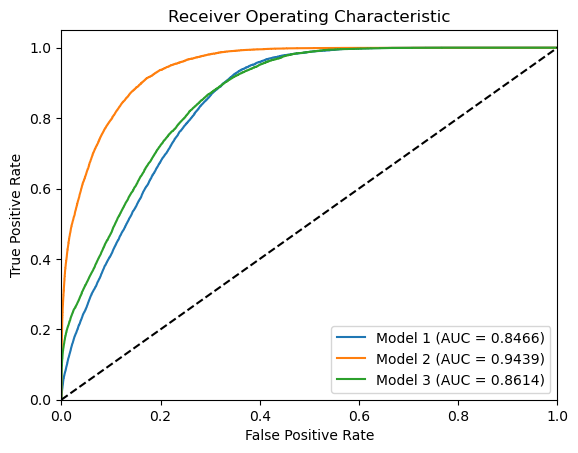

In [29]:
# ploting ROC curve for the best model
plt.figure()
plt.plot(fpr_1, tpr_1, label=f'Model 1 (AUC = {roc_auc_1:.4f})')
plt.plot(fpr_2, tpr_2, label=f'Model 2 (AUC = {roc_auc_2:.4f})')
plt.plot(fpr_3, tpr_3, label=f'Model 3 (AUC = {roc_auc_3:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
# # conclusion

print(f"\nConclusion: The best model is {best_model_name} with an AUC of {best_model_auc} and a validation loss of {best_model_val_loss}.")



Conclusion: The best model is Model 2 with an AUC of 0.9439 and a validation loss of 0.7408.
